# Wavelet Transform Modulus Maxima (WTMM) Tutorial

#### 1. **Introduction to Systems and Signals**

Let's start by thinking about systems and the signals they generate. Imagine you have a simple system, like a drum. When you hit the drum, it produces a sound—a signal. This sound can be thought of as a wave moving through the air. Similarly, many systems in nature, like weather patterns or the stock market, produce signals that change over time.

These signals can be smooth and regular, like a steady drumbeat, or they can be more complex and irregular, like the chaotic sounds of a busy city. The complexity of these signals can tell us a lot about the system that generated them.

#### 2. **Understanding Singularities**

Now, let's think about something a bit more abstract: singularities. In the simplest terms, a singularity is a point where a function (like our signal) behaves unusually. For example, imagine you're driving along a smooth road, and suddenly there's a sharp bump. That bump is a singularity in the otherwise smooth road.

In mathematical terms, singularities are points where the derivative of a function (which tells us the rate of change of the function) becomes very large or undefined. These points are crucial because they often indicate important features of the system, like sharp transitions or edges.

#### 3. **Fractal Dimension**

Fractals are complex structures that look similar at different scales. A famous example is the coastline of a country: no matter how much you zoom in, you always see the same kind of jagged, irregular shape. The fractal dimension is a way to describe how "complex" a fractal is. Unlike regular dimensions (like 1D for a line or 2D for a plane), fractal dimensions can be non-integer, reflecting the self-similarity and complexity of the structure.

#### 4. **Wavelet Transform**

To analyze signals, we often need to look at them at different scales. For example, if you’re listening to music, you might want to focus on the high notes or the low notes separately. The wavelet transform is a mathematical tool that lets us do this. Unlike the Fourier transform, which breaks a signal down into sine and cosine waves, the wavelet transform uses short, "wave-like" functions that can be stretched or compressed to analyze different parts of a signal in detail.

#### 5. **Connecting Singularities, Fractal Dimension, and Wavelet Transform**

When analyzing a signal, we might be interested in finding the singularities—those sharp, important features. The Wavelet Transform Modulus Maxima (WTMM) method is a way to do this. By applying the wavelet transform to a signal and looking at the maxima (peaks) of the transform, we can identify where the singularities are. Moreover, the distribution of these maxima can tell us about the fractal dimension of the signal, giving us insight into the complexity of the system that generated it.

# More Detailed Explanation

#### 1. **Singularities and Derivatives**

At a more advanced level, singularities are points where the derivative of a function either becomes infinite or is not well-defined. For example, consider the function $ f(x) = |x| $. At $ x = 0 $, the derivative does not exist because the slope of the function changes abruptly. This is a simple singularity.

Singularities are important in physics, engineering, and mathematics because they often represent critical points where the behavior of a system changes drastically. For example, in a physical system, a singularity might represent a point of phase transition, like water turning into ice.

#### 2. **Fractal Dimension and Self-Similarity**

Fractal dimensions are used to describe objects that are self-similar—meaning they look the same at different scales. The fractal dimension $ D $ is not an integer; it can be thought of as describing how a fractal "fills space". For example, the coastline of Britain has a fractal dimension greater than 1 but less than 2, indicating that it is more complex than a simple line but does not completely fill a plane.

Mathematically, the fractal dimension $ D $ can be calculated using the box-counting method, where we count how many boxes of size $ \epsilon $ are needed to cover the fractal and see how this number changes as $ \epsilon $ changes.

#### 3. **Wavelet Transform Modulus Maxima (WTMM) and Signal Analysis**

The wavelet transform is an integral transform that uses a wavelet function as a kernel. The continuous wavelet transform (CWT) of a function $ f(t) $ is given by:

$
W(a, b) = \frac{1}{\sqrt{a}} \int_{-\infty}^{\infty} f(t) \psi\left(\frac{t-b}{a}\right) dt
$

where $ \psi(t) $ is the mother wavelet, $ a $ is the scale parameter (which stretches or compresses the wavelet), and $ b $ is the translation parameter (which shifts the wavelet in time).

In the WTMM method, we apply the wavelet transform to a signal and look for the modulus maxima, which are the local maxima of the wavelet transform's magnitude. These maxima indicate the locations of singularities in the signal. By analyzing the scaling behavior of these maxima, we can estimate the fractal dimension of the signal.

### Advanced Mathematical Explanation

#### 1. **Singularities and Wavelets**

Consider a signal $ f(t) $ with a singularity at $ t_0 $. Near the singularity, $ f(t) $ can be approximated by a power law:

$
f(t) \sim |t - t_0|^{\alpha}
$

where $ \alpha $ is the Hölder exponent, which characterizes the strength of the singularity. The wavelet transform at scale $ a $ near the singularity behaves as:

$
W(a, b) \sim a^{\alpha + 1/2}
$

The modulus maxima of the wavelet transform occur at the points where the derivative of $ W(a, b) $ with respect to $ b $ is zero. These points correspond to the locations of singularities.

#### 2. **Fractal Dimension from WTMM**

The fractal dimension $ D $ of a signal can be related to the scaling behavior of the wavelet transform maxima. If $ N(\epsilon) $ is the number of maxima above a threshold $ \epsilon $, then the fractal dimension is given by:

$
D = \lim_{\epsilon \to 0} \frac{\log N(\epsilon)}{\log \frac{1}{\epsilon}}
$

This approach allows us to quantify the complexity of a signal by analyzing the distribution of its singularities.

# Applications and Motivation

The WTMM method is particularly useful in analyzing complex signals that contain singularities or fractal structures. Some applications include:

- **Turbulence analysis**: WTMM can be used to study the scaling properties of turbulent flows, which often exhibit fractal-like structures.
- **Biomedical signal processing**: WTMM helps in analyzing irregular heartbeats or brain waves, where singularities may indicate important events or abnormalities.
- **Financial data analysis**: In finance, WTMM can identify sharp transitions or crashes in stock market data, which are often associated with singularities.

The motivation for using WTMM lies in its ability to provide a multi-scale analysis of signals, capturing both the local singularities and the global fractal properties.

### Implementation in Python

Below is a Python implementation of the WTMM method:

- **Signal Generation**: We create a simple signal with a singularity at $ t = 0.5 $ where the frequency changes abruptly.
- **Wavelet Transform**: We perform the continuous wavelet transform (CWT) using the Mexican hat wavelet (`mexh`) and a range of scales.
- **Modulus Maxima**: We find the modulus maxima by checking where the wavelet coefficients reach a local maximum. These points indicate potential singularities in the signal.
- **Visualization**: Finally, we plot the original signal and the wavelet transform, with the modulus maxima highlighted in red.

This implementation provides a basic framework for using the WTMM method to analyze signals, and it can be adapted for more complex applications depending on the nature of the data being analyzed.

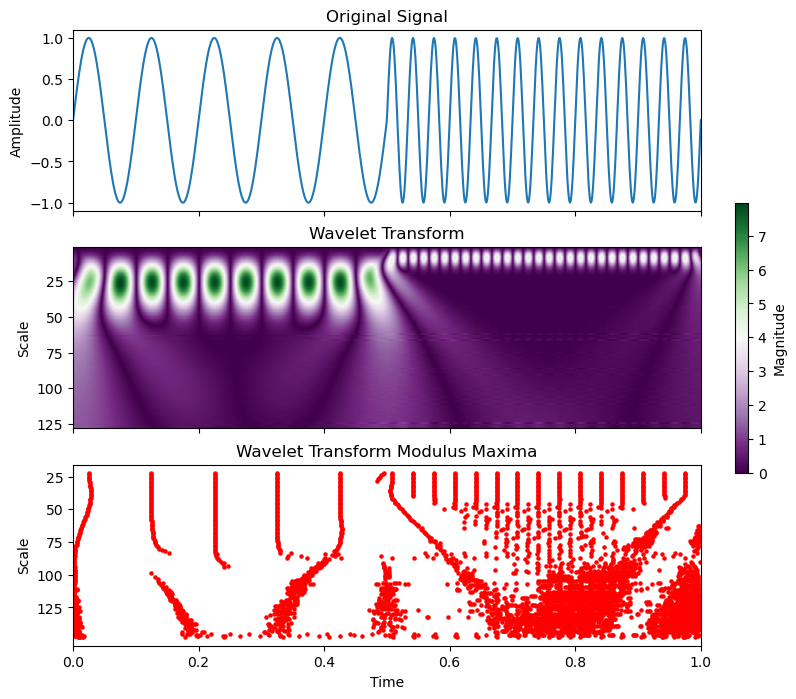

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # PyWavelets library for wavelet transforms


def wavelet_transform(signal, wavelet='mexh', scales=np.arange(1, 128)):
    '''
    Perform the continuous wavelet transform (CWT) on the input signal.

    Parameters:
    signal (array-like): Input signal to analyze
    wavelet (str): The mother wavelet to use ('mexh' is the Mexican hat wavelet)
    scales (array-like): Array of scales to use for the CWT

    Returns:
    coeffs (2D array): The wavelet transform coefficients
    '''
    coeffs, _ = pywt.cwt(signal, scales, wavelet)
    return coeffs

def find_modulus_maxima(coeffs):
    '''
    Identify the modulus maxima of the wavelet transform coefficients.

    Parameters:
    coeffs (2D array): The wavelet transform coefficients

    Returns:
    maxima (list of tuples): List of tuples indicating the scale and position of maxima
    '''
    maxima = []
    for scale_index, scale_coeffs in enumerate(coeffs):
        for i in range(1, len(scale_coeffs) - 1):
            if scale_coeffs[i - 1] < scale_coeffs[i] > scale_coeffs[i + 1]:
                maxima.append((scale_index, i))
    return maxima


def plot_original_signal(ax, t, signal):
    '''
    Plot the original signal.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    t (array-like): Time array.
    signal (array-like): The signal data.
    '''
    ax.plot(t, signal)
    ax.set_title('Original Signal')
    ax.set_ylabel('Amplitude')

def plot_wavelet_transform(ax, coeffs):
    '''
    Plot the wavelet transform of the signal.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    coeffs (2D array): The wavelet transform coefficients.
    '''
    cax = ax.imshow(np.abs(coeffs), extent=[0, 1, 128, 1], cmap='PRGn', aspect='auto')
    ax.set_title('Wavelet Transform')
    ax.set_ylabel('Scale')
    return cax

def plot_modulus_maxima(ax, maxima, signal_length):
    '''
    Plot the modulus maxima of the wavelet transform.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    maxima (list of tuples): List of tuples indicating the scale and position of maxima.
    signal_length (int): The length of the signal for normalization.
    '''
    maxima_y = [128 - m[0] for m in maxima]  # Inverting the y-values for correct alignment
    ax.scatter([m[1] / signal_length for m in maxima], maxima_y, color='red', s=5)
    ax.set_title('Wavelet Transform Modulus Maxima')
    ax.set_xlabel('Time')
    ax.set_ylabel('Scale')

    # Set the y-ticks to match the wavelet transform plot
    yticks = [25, 50, 75, 100, 125]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks[::-1])  # Reverse the y-tick labels

def plot_wavelet_analysis(t, signal, coeffs, maxima):
    '''
    Plot the full wavelet analysis including the original signal, wavelet transform, and modulus maxima.

    Parameters:
    t (array-like): Time array.
    signal (array-like): The original signal.
    coeffs (2D array): The wavelet transform coefficients.
    maxima (list of tuples): List of tuples indicating the scale and position of maxima.
    '''
    fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    # Plot the original signal
    plot_original_signal(ax[0], t, signal)

    # Plot the wavelet transform
    cax = plot_wavelet_transform(ax[1], coeffs)

    # Plot the modulus maxima
    plot_modulus_maxima(ax[2], maxima, len(signal))

    # Adjust layout to shrink the whole figure and make space for the color bar on the right
    plt.subplots_adjust(right=0.8)

    # Add the color bar externally on the right
    fig.colorbar(cax, ax=ax.ravel().tolist(), label='Magnitude', orientation='vertical', fraction=0.02, pad=0.05)

    plt.show()


def generate_singular_signal(t_start=0, t_end=1, num_points=1024, freq1=10, freq2=30, singularity_point=0.5):
    '''
    Generate a sample signal with a singularity, where the signal transitions from one frequency to another.

    Parameters:
    t_start (float): Start time of the signal.
    t_end (float): End time of the signal.
    num_points (int): Number of time points in the signal.
    freq1 (float): Frequency of the signal before the singularity.
    freq2 (float): Frequency of the signal after the singularity.
    singularity_point (float): The point in time where the singularity occurs (in the range [t_start, t_end]).

    Returns:
    t (array-like): Time array.
    signal (array-like): The generated signal with a singularity.
    '''
    t = np.linspace(t_start, t_end, num_points)
    signal = np.piecewise(t, 
                          [t < singularity_point, t >= singularity_point], 
                          [lambda t: np.sin(2 * np.pi * freq1 * t), 
                           lambda t: np.sin(2 * np.pi * freq2 * t)])
    return t, signal


    
# Generate a sample signal with a singularity:
t, signal = generate_singular_signal(t_start=0, t_end=1, num_points=1024, freq1=10, freq2=30, singularity_point=0.5)

# Perform the wavelet transform
coeffs = wavelet_transform(signal)

# Find modulus maxima
maxima = find_modulus_maxima(coeffs)

# Plot the full wavelet analysis
plot_wavelet_analysis(t, signal, coeffs, maxima)


**Figure:** This figure illustrates the analysis of a signal using the Wavelet Transform Modulus Maxima (WTMM) method.

- **Top Plot (Original Signal):** The original signal is plotted over time, showing its amplitude variation. The signal transitions from a lower frequency (10 Hz) to a higher frequency (30 Hz) at \( t = 0.5 \). This abrupt change in frequency creates a singularity at the point of transition, which can be visually identified by the sudden increase in the oscillation frequency.

- **Middle Plot (Wavelet Transform):** The wavelet transform of the signal is visualized across different scales. The color intensity indicates the magnitude of the transform, with higher magnitudes highlighted in green. This plot reveals how the signal's frequency components change over time. The singularity at \( t = 0.5 \) is represented by a distinct change in the pattern of the wavelet coefficients, observable across various scales.

- **Bottom Plot (Wavelet Transform Modulus Maxima, or "Skeleton"):** The modulus maxima of the wavelet transform are plotted in red, highlighting the locations of singularities in the signal. The singularity at \( t = 0.5 \) is clearly visible in this plot as a concentration of red dots across scales at the transition point. This plot, often referred to as the "skeleton," provides a direct visualization of the signal's singularities, capturing the critical points where the signal's behavior changes abruptly.

The color bar on the right represents the magnitude of the wavelet transform, with higher values indicating stronger signal features at specific scales and times. The bottom plot is particularly valuable for pinpointing singularities in the signal, as it directly shows where these abrupt changes occur.

# Another example, the Weierstrass function

This a classic example of a continuous function that is nowhere differentiable. This function exhibits fractal properties because it has self-similar structure at different scales.

Here's how you can implement the Weierstrass function, perform the wavelet transform, and plot the results in the same manner as your previous example:

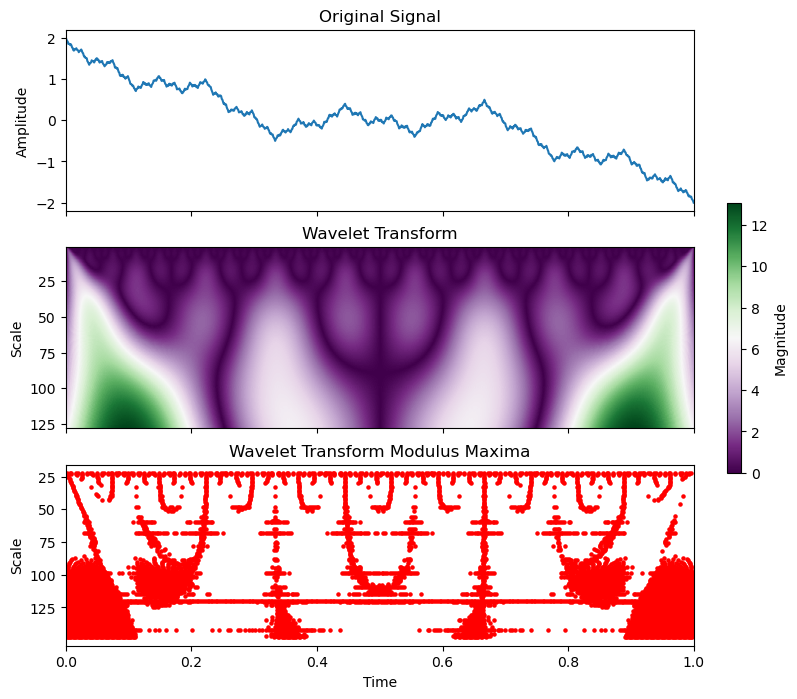

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # PyWavelets library for wavelet transforms

def weierstrass_function(t, a=0.5, b=3, n_terms=100):
    '''
    Generate a Weierstrass function, which is a continuous, nowhere-differentiable function.
    
    Parameters:
    t (array-like): Time array.
    a (float): Scale factor, where 0 < a < 1.
    b (float): Frequency factor, where b is a positive integer.
    n_terms (int): Number of terms in the series.
    
    Returns:
    signal (array-like): The Weierstrass function evaluated at each point in t.
    '''
    signal = np.zeros_like(t)
    for n in range(n_terms):
        signal += a**n * np.cos(b**n * np.pi * t)
    return signal

def generate_weierstrass_function(t_start=0, t_end=1, num_points=1024, a=0.5, b=3, n_terms=100):
    '''
    Generate the Weierstrass function, a continuous, nowhere-differentiable function.

    Parameters:
    t_start (float): Start time of the signal.
    t_end (float): End time of the signal.
    num_points (int): Number of time points in the signal.
    a (float): Scale factor, where 0 < a < 1.
    b (float): Frequency factor, where b is a positive integer.
    n_terms (int): Number of terms in the series.

    Returns:
    t (array-like): Time array.
    signal (array-like): The generated Weierstrass function.
    '''
    t = np.linspace(t_start, t_end, num_points)
    signal = np.zeros_like(t)
    for n in range(n_terms):
        signal += a**n * np.cos(b**n * np.pi * t)
    return t, signal



# Generate the Weierstrass function
t, signal = generate_weierstrass_function(t_start=0, t_end=1, num_points=1024, a=0.5, b=3, n_terms=100)

# Perform the wavelet transform
coeffs = wavelet_transform(signal)

# Find modulus maxima
maxima = find_modulus_maxima(coeffs)

# Plot the full wavelet analysis
plot_wavelet_analysis(t, signal, coeffs, maxima)


### Explanation:

1. **Weierstrass Function:**
   - The Weierstrass function is a classic example of a fractal function. It is continuous everywhere but differentiable nowhere. This function is created by summing cosine waves of increasing frequency and decreasing amplitude.
   - The parameters \(a\) and \(b\) control the scaling and frequency of the waves, respectively, and the number of terms \(n\_terms\) determines how many waves are summed.

2. **Wavelet Transform and Modulus Maxima:**
   - The wavelet transform is applied to the Weierstrass function to analyze its frequency content across scales.
   - The modulus maxima plot (often referred to as the "skeleton") shows where the wavelet coefficients reach local maxima, highlighting the fractal structure and singularities of the Weierstrass function.

3. **Plotting:**
   - The first plot shows the original Weierstrass function.
   - The second plot shows the wavelet transform, revealing the self-similar structure of the function at different scales.
   - The third plot shows the modulus maxima, which directly highlights the fractal properties and singularities within the function.


# Example 3: Double Pendulum

![Double Pendulum](./Double-Pendulum.png)
*[source: wikipedia]

#### Introduction to the Double Pendulum

The double pendulum is a classic example of a dynamical system that exhibits complex, chaotic behavior. It consists of two pendulums attached end to end, with the first pendulum (the "top arm") connected to a fixed pivot and the second pendulum (the "bottom arm") connected to the end of the first. Despite its simple structure, the double pendulum is highly sensitive to initial conditions, meaning that even slight differences in the starting angles or velocities can lead to drastically different motions over time.

#### Chaos in the Double Pendulum

Chaos, in the context of dynamical systems, refers to a behavior that is deterministic yet unpredictable. In the double pendulum, this chaotic behavior arises because the motion of the two arms is governed by a set of nonlinear differential equations. As the system evolves, small variations in the initial state are amplified, leading to highly irregular and seemingly random motion. This sensitivity to initial conditions is a hallmark of chaotic systems.

One of the reasons the double pendulum is particularly interesting is that it provides a tangible and visual example of chaos. The paths traced out by the pendulum’s arms can appear erratic and complex, and these paths are often highly sensitive to the precise initial conditions.

#### Analyzing the Double Pendulum with WTMM

The Wavelet Transform Modulus Maxima (WTMM) method is a powerful tool for analyzing the chaotic motion of the double pendulum. Traditional Fourier analysis, while useful for studying periodic signals, often falls short in capturing the nuances of chaotic systems because it assumes that the signal can be decomposed into a sum of sine and cosine waves. However, chaotic signals, like those generated by a double pendulum, often contain singularities—sharp transitions or irregularities—that Fourier analysis cannot effectively handle.

The WTMM method addresses this limitation by allowing for a multi-scale analysis of the signal. By applying the wavelet transform to the angular displacements of the pendulum’s arms, we can analyze the signal at different scales and identify the singularities or critical points in the motion. The modulus maxima of the wavelet transform (often referred to as the "skeleton" of the signal) provide a detailed map of where these singularities occur across different scales.

In this example, we apply the WTMM method to both the top and bottom arms of the double pendulum. The analysis reveals the chaotic nature of the system by highlighting the intricate patterns and singularities that arise in the motion over time. By visualizing both the wavelet transform and its modulus maxima, we gain insights into the complex dynamics of the double pendulum that would be difficult to obtain through other methods.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # PyWavelets library for wavelet transforms
from scipy.integrate import solve_ivp

def double_pendulum_derivs(t, y, m1, m2, L1, L2, g):
    '''
    Compute the derivatives for the double pendulum system.

    Parameters:
    t (float): Time variable (not used in this function but required by solve_ivp)
    y (array-like): Array containing [theta1, omega1, theta2, omega2]
    m1 (float): Mass of the first pendulum
    m2 (float): Mass of the second pendulum
    L1 (float): Length of the first pendulum
    L2 (float): Length of the second pendulum
    g (float): Gravitational acceleration

    Returns:
    dydt (array-like): Derivatives [dtheta1/dt, domega1/dt, dtheta2/dt, domega2/dt]
    '''
    theta1, omega1, theta2, omega2 = y
    
    delta = theta2 - theta1
    
    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta) * np.cos(delta)
    den2 = (L2 / L1) * den1
    
    domega1_dt = (m2 * L1 * omega1**2 * np.sin(delta) * np.cos(delta) +
                  m2 * g * np.sin(theta2) * np.cos(delta) +
                  m2 * L2 * omega2**2 * np.sin(delta) -
                  (m1 + m2) * g * np.sin(theta1)) / den1
    
    domega2_dt = (-m2 * L2 * omega2**2 * np.sin(delta) * np.cos(delta) +
                  (m1 + m2) * (g * np.sin(theta1) * np.cos(delta) -
                  L1 * omega1**2 * np.sin(delta) -
                  g * np.sin(theta2))) / den2
    
    return [omega1, domega1_dt, omega2, domega2_dt]

def simulate_double_pendulum(m1, m2, L1, L2, theta1_0, theta2_0, omega1_0, omega2_0, g, t_span, t_eval):
    '''
    Simulate the motion of a double pendulum using initial conditions.

    Parameters:
    m1, m2 (float): Masses of the pendulums
    L1, L2 (float): Lengths of the pendulums
    theta1_0, theta2_0 (float): Initial angles of the pendulums
    omega1_0, omega2_0 (float): Initial angular velocities
    g (float): Gravitational acceleration
    t_span (tuple): Time span for the simulation
    t_eval (array-like): Time points to evaluate the solution

    Returns:
    t (array-like): Time points
    theta1 (array-like): Angular position of the first pendulum
    theta2 (array-like): Angular position of the second pendulum
    '''
    y0 = [theta1_0, omega1_0, theta2_0, omega2_0]
    sol = solve_ivp(double_pendulum_derivs, t_span, y0, args=(m1, m2, L1, L2, g), t_eval=t_eval)
    theta1, theta2 = sol.y[0], sol.y[2]
    return sol.t, theta1, theta2

def calculate_positions(theta1, theta2, L1, L2):
    '''
    Calculate the x, y positions of the top and bottom arms of the double pendulum.

    Parameters:
    theta1 (array-like): Angular positions of the top arm.
    theta2 (array-like): Angular positions of the bottom arm.
    L1 (float): Length of the first pendulum arm.
    L2 (float): Length of the second pendulum arm.

    Returns:
    x1, y1, x2, y2 (array-like): x and y positions of the top and bottom arms over time.
    '''
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    return x1, y1, x2, y2


def plot_wavelet_transform(ax, coeffs, t):
    '''
    Plot the wavelet transform of the signal with flipped y-axis labels.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    coeffs (2D array): The wavelet transform coefficients.
    t (array-like): The time array to correctly align the transform.
    '''
    extent = [t[0], t[-1], 1, coeffs.shape[0]]
    cax = ax.imshow(np.abs(coeffs), extent=extent, cmap='PRGn', aspect='auto')
    ax.set_ylabel('Scale')

    # Flip the y-axis labels
    yticks = ax.get_yticks()
    ax.set_yticklabels(yticks[::-1])

    return cax



def plot_modulus_maxima(ax, maxima, t):
    '''
    Plot the modulus maxima of the wavelet transform.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    maxima (list of tuples): List of tuples indicating the scale and position of maxima.
    t (array-like): Time array to correctly align the maxima.
    '''
    maxima_x = [m[1] / len(t) * (t[-1] - t[0]) + t[0] for m in maxima]  # Correctly scale x values
    maxima_y = [128 - m[0] for m in maxima]  # Inverting the y-values for correct alignment
    ax.scatter(maxima_x, maxima_y, color='red', s=5)
    ax.set_xlabel('Time')
    ax.set_ylabel('Scale')

    # Set the y-ticks to match the wavelet transform plot
    yticks = [25, 50, 75, 100, 125]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks[::-1])  # Reverse the y-tick labels


    
def plot_double_pendulum_path(x1, y1, x2, y2):
    '''
    Plot the path of the double pendulum's top and bottom arms over time.

    Parameters:
    x1, y1 (array-like): X and Y positions of the top arm.
    x2, y2 (array-like): X and Y positions of the bottom arm.
    '''
    plt.figure(figsize=(8, 8))
    plt.plot(x1, y1, label='Top Arm Path', color='blue')
    plt.plot(x2, y2, label='Bottom Arm Path', color='red')
    plt.title('Path of Double Pendulum Over Time')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_wavelet_transform(ax, coeffs, t):
    '''
    Plot the wavelet transform of the signal with flipped y-axis labels.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    coeffs (2D array): The wavelet transform coefficients.
    t (array-like): The time array to correctly align the transform.
    '''
    extent = [t[0], t[-1], 1, coeffs.shape[0]]
    cax = ax.imshow(np.abs(coeffs), extent=extent, cmap='PRGn', aspect='auto')
    ax.set_ylabel('Scale')

    # Flip the y-axis labels
    yticks = ax.get_yticks()
    ax.set_yticklabels(yticks[::-1])

    return cax



def plot_modulus_maxima(ax, maxima, t):
    '''
    Plot the modulus maxima of the wavelet transform.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    maxima (list of tuples): List of tuples indicating the scale and position of maxima.
    t (array-like): Time array to correctly align the maxima.
    '''
    maxima_x = [m[1] / len(t) * (t[-1] - t[0]) + t[0] for m in maxima]  # Correctly scale x values
    maxima_y = [128 - m[0] for m in maxima]  # Inverting the y-values for correct alignment
    ax.scatter(maxima_x, maxima_y, color='red', s=5)
    ax.set_xlabel('Time')
    ax.set_ylabel('Scale')

    # Set the y-ticks to match the wavelet transform plot
    yticks = [25, 50, 75, 100, 125]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks[::-1])  # Reverse the y-tick labels

    

def analyze_and_plot_wavelet_transform(t, theta1, theta2):
    # Perform the wavelet transform on theta1 and theta2
    coeffs1 = wavelet_transform(theta1)
    coeffs2 = wavelet_transform(theta2)

    # Find modulus maxima for both theta1 and theta2
    maxima1 = find_modulus_maxima(coeffs1)
    maxima2 = find_modulus_maxima(coeffs2)

    # Plot everything
    fig, ax = plt.subplots(6, 1, figsize=(10, 16), sharex=True)

    # Plot the original signal (theta1) in the first subplot
    plot_original_signal(ax[0], t, theta1)
    ax[0].set_title('Double Pendulum - Theta1 (Top Arm)')

    # Plot the wavelet transform for theta1 in the second subplot
    cax1 = plot_wavelet_transform(ax[1], coeffs1, t)
    ax[1].set_title('Wavelet Transform (Top Arm)')

    # Plot the modulus maxima for theta1 in the third subplot
    plot_modulus_maxima(ax[2], maxima1, t)  # Ensure consistent scaling
    ax[2].set_title('Wavelet Transform Modulus Maxima (Top Arm)')

    # Plot the original signal (theta2) in the fourth subplot
    plot_original_signal(ax[3], t, theta2)
    ax[3].set_title('Double Pendulum - Theta2 (Bottom Arm)')

    # Plot the wavelet transform for theta2 in the fifth subplot
    cax2 = plot_wavelet_transform(ax[4], coeffs2, t)
    ax[4].set_title('Wavelet Transform (Bottom Arm)')

    # Plot the modulus maxima for theta2 in the sixth subplot
    plot_modulus_maxima(ax[5], maxima2, t)  # Ensure consistent scaling
    ax[5].set_title('Wavelet Transform Modulus Maxima (Bottom Arm)')

    # Adjust layout to shrink the whole figure and make space for the color bars on the right
    plt.subplots_adjust(right=0.85)

    # Add the color bars externally on the right
#     fig.colorbar(cax1, ax=[ax[1], ax[2]], location='right', label='Magnitude', orientation='vertical', fraction=0.02, pad=0.15)
#     fig.colorbar(cax2, ax=[ax[4], ax[5]], location='right', label='Magnitude', orientation='vertical', fraction=0.02, pad=0.15)

    plt.tight_layout()
    plt.show()

    
def plot_double_pendulum_path(x1, y1, x2, y2):
    '''
    Plot the path of the double pendulum's top and bottom arms over time.

    Parameters:
    x1, y1 (array-like): X and Y positions of the top arm.
    x2, y2 (array-like): X and Y positions of the bottom arm.
    '''
    plt.figure(figsize=(8, 8))
    plt.plot(x1, y1, label='Top Arm Path', color='blue')
    plt.plot(x2, y2, label='Bottom Arm Path', color='red')
    plt.title('Path of Double Pendulum Over Time')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    plt.show()

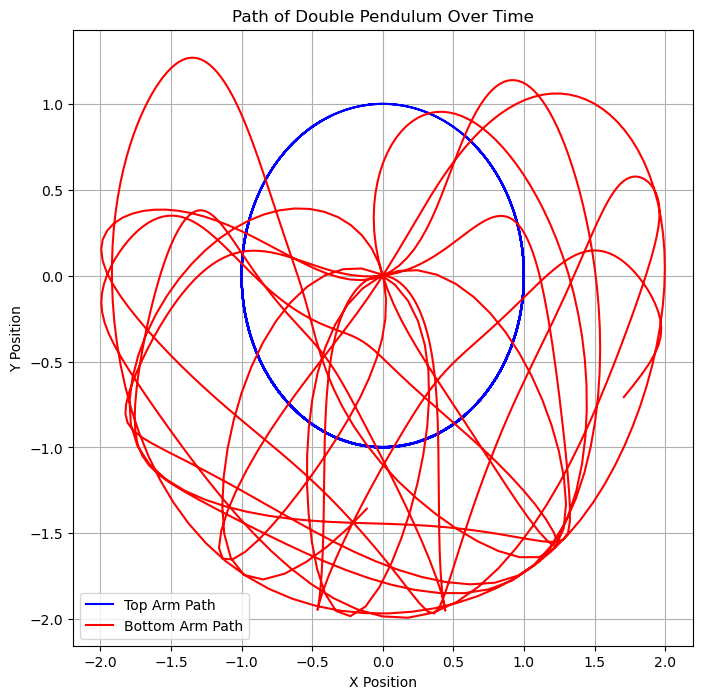

/tmp/ipykernel_86871/2332237077.py:161: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks[::-1])


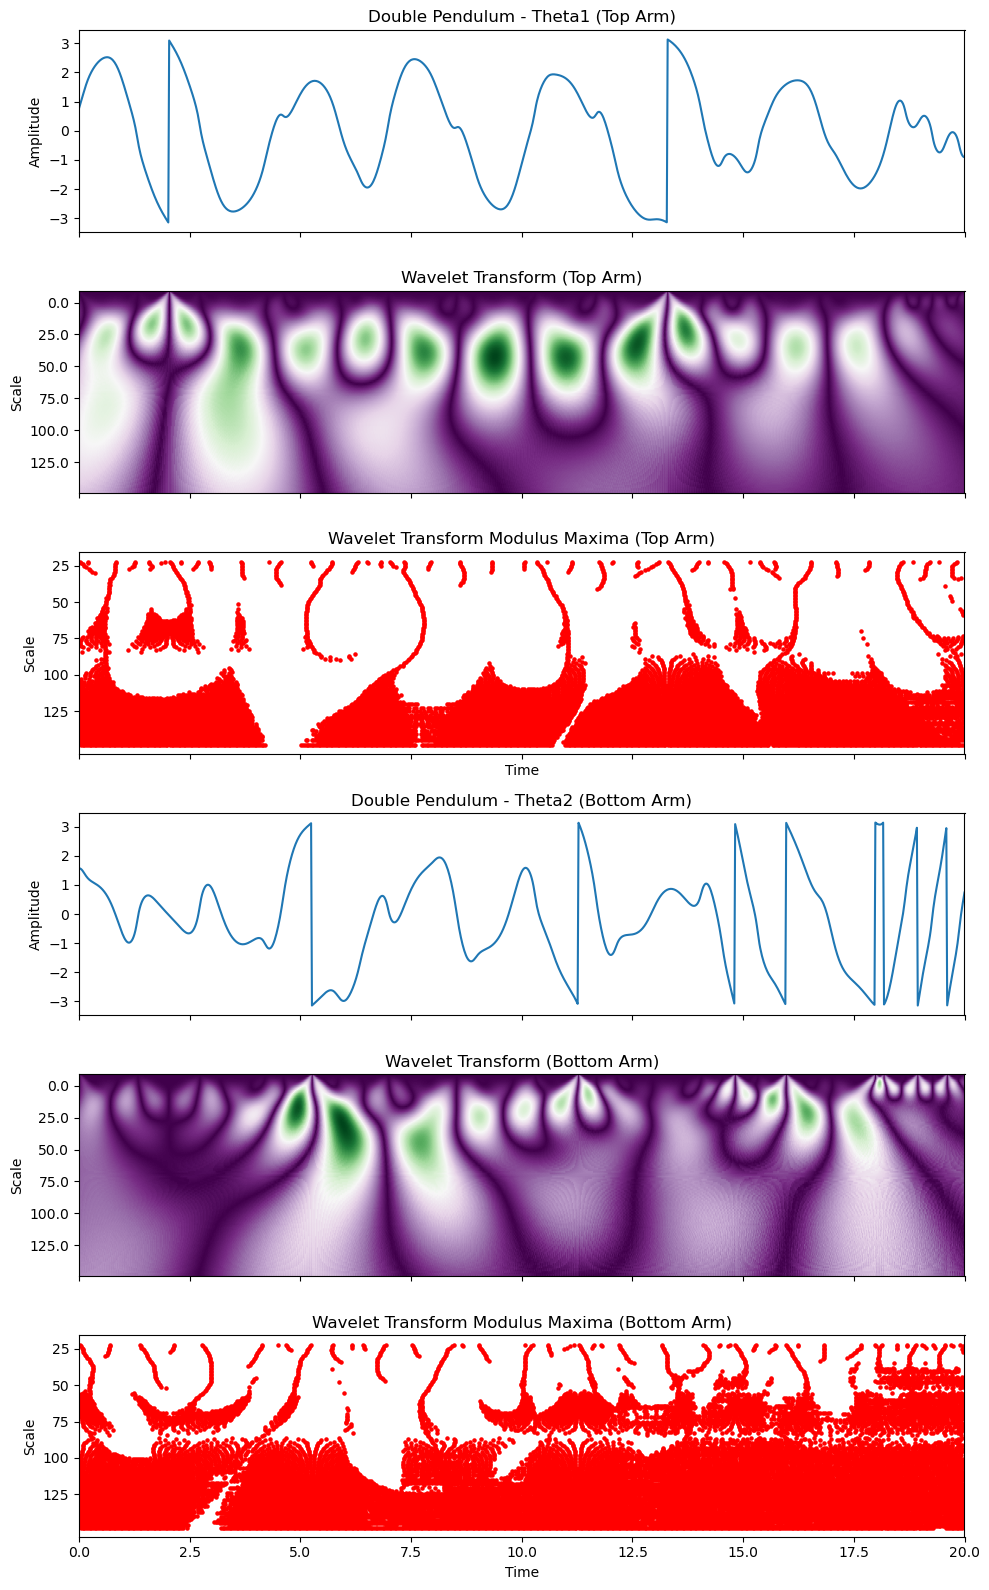

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # PyWavelets library for wavelet transforms
from scipy.integrate import solve_ivp

def double_pendulum_derivs(t, y, m1, m2, L1, L2, g):
    '''
    Compute the derivatives for the double pendulum system.

    Parameters:
    t (float): Time variable (not used in this function but required by solve_ivp)
    y (array-like): Array containing [theta1, omega1, theta2, omega2]
    m1 (float): Mass of the first pendulum
    m2 (float): Mass of the second pendulum
    L1 (float): Length of the first pendulum
    L2 (float): Length of the second pendulum
    g (float): Gravitational acceleration

    Returns:
    dydt (array-like): Derivatives [dtheta1/dt, domega1/dt, dtheta2/dt, domega2/dt]
    '''
    theta1, omega1, theta2, omega2 = y
    
    delta = theta2 - theta1
    
    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta) * np.cos(delta)
    den2 = (L2 / L1) * den1
    
    domega1_dt = (m2 * L1 * omega1**2 * np.sin(delta) * np.cos(delta) +
                  m2 * g * np.sin(theta2) * np.cos(delta) +
                  m2 * L2 * omega2**2 * np.sin(delta) -
                  (m1 + m2) * g * np.sin(theta1)) / den1
    
    domega2_dt = (-m2 * L2 * omega2**2 * np.sin(delta) * np.cos(delta) +
                  (m1 + m2) * (g * np.sin(theta1) * np.cos(delta) -
                  L1 * omega1**2 * np.sin(delta) -
                  g * np.sin(theta2))) / den2
    
    return [omega1, domega1_dt, omega2, domega2_dt]

def simulate_double_pendulum(m1, m2, L1, L2, theta1_0, theta2_0, omega1_0, omega2_0, g, t_span, t_eval):
    '''
    Simulate the motion of a double pendulum using initial conditions.

    Parameters:
    m1, m2 (float): Masses of the pendulums
    L1, L2 (float): Lengths of the pendulums
    theta1_0, theta2_0 (float): Initial angles of the pendulums
    omega1_0, omega2_0 (float): Initial angular velocities
    g (float): Gravitational acceleration
    t_span (tuple): Time span for the simulation
    t_eval (array-like): Time points to evaluate the solution

    Returns:
    t (array-like): Time points
    theta1 (array-like): Angular position of the first pendulum
    theta2 (array-like): Angular position of the second pendulum
    '''
    y0 = [theta1_0, omega1_0, theta2_0, omega2_0]
    sol = solve_ivp(double_pendulum_derivs, t_span, y0, args=(m1, m2, L1, L2, g), t_eval=t_eval)
    theta1, theta2 = sol.y[0], sol.y[2]
    return sol.t, theta1, theta2

def calculate_positions(theta1, theta2, L1, L2):
    '''
    Calculate the x, y positions of the top and bottom arms of the double pendulum.

    Parameters:
    theta1 (array-like): Angular positions of the top arm.
    theta2 (array-like): Angular positions of the bottom arm.
    L1 (float): Length of the first pendulum arm.
    L2 (float): Length of the second pendulum arm.

    Returns:
    x1, y1, x2, y2 (array-like): x and y positions of the top and bottom arms over time.
    '''
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    return x1, y1, x2, y2


def plot_wavelet_transform(ax, coeffs, t):
    '''
    Plot the wavelet transform of the signal with flipped y-axis labels.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    coeffs (2D array): The wavelet transform coefficients.
    t (array-like): The time array to correctly align the transform.
    '''
    extent = [t[0], t[-1], 1, coeffs.shape[0]]
    cax = ax.imshow(np.abs(coeffs), extent=extent, cmap='PRGn', aspect='auto')
    ax.set_ylabel('Scale')

    # Flip the y-axis labels
    yticks = ax.get_yticks()
    ax.set_yticklabels(yticks[::-1])

    return cax



def plot_modulus_maxima(ax, maxima, t):
    '''
    Plot the modulus maxima of the wavelet transform.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    maxima (list of tuples): List of tuples indicating the scale and position of maxima.
    t (array-like): Time array to correctly align the maxima.
    '''
    maxima_x = [m[1] / len(t) * (t[-1] - t[0]) + t[0] for m in maxima]  # Correctly scale x values
    maxima_y = [128 - m[0] for m in maxima]  # Inverting the y-values for correct alignment
    ax.scatter(maxima_x, maxima_y, color='red', s=5)
    ax.set_xlabel('Time')
    ax.set_ylabel('Scale')

    # Set the y-ticks to match the wavelet transform plot
    yticks = [25, 50, 75, 100, 125]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks[::-1])  # Reverse the y-tick labels


    
def plot_double_pendulum_path(x1, y1, x2, y2):
    '''
    Plot the path of the double pendulum's top and bottom arms over time.

    Parameters:
    x1, y1 (array-like): X and Y positions of the top arm.
    x2, y2 (array-like): X and Y positions of the bottom arm.
    '''
    plt.figure(figsize=(8, 8))
    plt.plot(x1, y1, label='Top Arm Path', color='blue')
    plt.plot(x2, y2, label='Bottom Arm Path', color='red')
    plt.title('Path of Double Pendulum Over Time')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_wavelet_transform(ax, coeffs, t):
    '''
    Plot the wavelet transform of the signal with flipped y-axis labels.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    coeffs (2D array): The wavelet transform coefficients.
    t (array-like): The time array to correctly align the transform.
    '''
    extent = [t[0], t[-1], 1, coeffs.shape[0]]
    cax = ax.imshow(np.abs(coeffs), extent=extent, cmap='PRGn', aspect='auto')
    ax.set_ylabel('Scale')

    # Flip the y-axis labels
    yticks = ax.get_yticks()
    ax.set_yticklabels(yticks[::-1])

    return cax



def plot_modulus_maxima(ax, maxima, t):
    '''
    Plot the modulus maxima of the wavelet transform.

    Parameters:
    ax (matplotlib.axes.Axes): The subplot axes to plot on.
    maxima (list of tuples): List of tuples indicating the scale and position of maxima.
    t (array-like): Time array to correctly align the maxima.
    '''
    maxima_x = [m[1] / len(t) * (t[-1] - t[0]) + t[0] for m in maxima]  # Correctly scale x values
    maxima_y = [128 - m[0] for m in maxima]  # Inverting the y-values for correct alignment
    ax.scatter(maxima_x, maxima_y, color='red', s=5)
    ax.set_xlabel('Time')
    ax.set_ylabel('Scale')

    # Set the y-ticks to match the wavelet transform plot
    yticks = [25, 50, 75, 100, 125]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks[::-1])  # Reverse the y-tick labels

    

def analyze_and_plot_wavelet_transform(t, theta1, theta2):
    # Perform the wavelet transform on theta1 and theta2
    coeffs1 = wavelet_transform(theta1)
    coeffs2 = wavelet_transform(theta2)

    # Find modulus maxima for both theta1 and theta2
    maxima1 = find_modulus_maxima(coeffs1)
    maxima2 = find_modulus_maxima(coeffs2)

    # Plot everything
    fig, ax = plt.subplots(6, 1, figsize=(10, 16), sharex=True)

    # Plot the original signal (theta1) in the first subplot
    plot_original_signal(ax[0], t, theta1)
    ax[0].set_title('Double Pendulum - Theta1 (Top Arm)')

    # Plot the wavelet transform for theta1 in the second subplot
    cax1 = plot_wavelet_transform(ax[1], coeffs1, t)
    ax[1].set_title('Wavelet Transform (Top Arm)')

    # Plot the modulus maxima for theta1 in the third subplot
    plot_modulus_maxima(ax[2], maxima1, t)  # Ensure consistent scaling
    ax[2].set_title('Wavelet Transform Modulus Maxima (Top Arm)')

    # Plot the original signal (theta2) in the fourth subplot
    plot_original_signal(ax[3], t, theta2)
    ax[3].set_title('Double Pendulum - Theta2 (Bottom Arm)')

    # Plot the wavelet transform for theta2 in the fifth subplot
    cax2 = plot_wavelet_transform(ax[4], coeffs2, t)
    ax[4].set_title('Wavelet Transform (Bottom Arm)')

    # Plot the modulus maxima for theta2 in the sixth subplot
    plot_modulus_maxima(ax[5], maxima2, t)  # Ensure consistent scaling
    ax[5].set_title('Wavelet Transform Modulus Maxima (Bottom Arm)')

    # Adjust layout to shrink the whole figure and make space for the color bars on the right
    plt.subplots_adjust(right=0.85)

    # Add the color bars externally on the right
#     fig.colorbar(cax1, ax=[ax[1], ax[2]], location='right', label='Magnitude', orientation='vertical', fraction=0.02, pad=0.15)
#     fig.colorbar(cax2, ax=[ax[4], ax[5]], location='right', label='Magnitude', orientation='vertical', fraction=0.02, pad=0.15)

    plt.tight_layout()
    plt.show()

    
def plot_double_pendulum_path(x1, y1, x2, y2):
    '''
    Plot the path of the double pendulum's top and bottom arms over time.

    Parameters:
    x1, y1 (array-like): X and Y positions of the top arm.
    x2, y2 (array-like): X and Y positions of the bottom arm.
    '''
    plt.figure(figsize=(8, 8))
    plt.plot(x1, y1, label='Top Arm Path', color='blue')
    plt.plot(x2, y2, label='Bottom Arm Path', color='red')
    plt.title('Path of Double Pendulum Over Time')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    plt.show()



import numpy as np
import matplotlib.pyplot as plt
import pywt  # PyWavelets library for wavelet transforms
from scipy.integrate import solve_ivp

# Double Pendulum Parameters
m1, m2 = 1.0, 1.0          # Masses of the pendulums (kg)
L1, L2 = 1.0, 1.0          # Lengths of the pendulum arms (m)
g = 9.81                   # Gravitational acceleration (m/s^2)

# Initial Conditions (try various values)
theta1_0 = np.pi / 4       # Initial angle of the first pendulum (rad)
theta2_0 = np.pi / 2       # Initial angle of the second pendulum (rad)
omega1_0 = 5.0             # Initial angular velocity of the first pendulum (rad/s)
omega2_0 = 0.0             # Initial angular velocity of the second pendulum (rad/s)

# Simulation Time Span
t_span = (0, 20)           # Time span for the simulation (s)
t_eval = np.linspace(t_span[0], t_span[1], 1024)  # Array of time points to evaluate the solution

# Simulate the double pendulum motion
t, theta1, theta2 = simulate_double_pendulum(m1, m2, L1, L2, theta1_0, theta2_0, omega1_0, omega2_0, g, t_span, t_eval)

# Calculate the positions of the top and bottom arms of the double pendulum
x1, y1, x2, y2 = calculate_positions(theta1, theta2, L1, L2)

# Plot the path of the double pendulum
plot_double_pendulum_path(x1, y1, x2, y2)

# Normalize theta values to the range [-pi, pi] to avoid wrapping issues
theta1 = np.mod(theta1 + np.pi, 2*np.pi) - np.pi
theta2 = np.mod(theta2 + np.pi, 2*np.pi) - np.pi

# Perform wavelet transform analysis and plot the results
analyze_and_plot_wavelet_transform(t, theta1, theta2)
